# <center> Cab Industry Insights: Guiding Strategic Investment Decisions

## Business Understanding 

XYZ, a private firm in the US, is considering an investment in the rapidly growing Cab industry, which has seen significant expansion in recent years with multiple key players in the market. As part of their Go-to-Market (G2M) strategy, XYZ seeks to thoroughly understand the market before making a final investment decision.

Multiple data sets including information on 2 cab companies are provided. Each dataset represents different aspects of the customer profile. XYZ aims to leverage our actionable insights to identify the most promising company for their investment.

## Dataset

Four individual data sets are given. Time period of data is from 31/01/2016 to 31/12/2018.

Here is the list of datasets provided for the analysis:

**Cab_Data.csv**  – This file includes details of transaction for 2 cab companies

**Customer_ID.csv**  – This is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv**  – This is a mapping table that contains transaction to customer mapping and payment mode

**City.csv** – This file contains list of US cities, their population and number of cab users

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

## Preparing and Understanding Data

In [2]:
cab = pd.read_csv("Cab_Data.csv")
cab.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632


In [3]:
city = pd.read_csv("city.csv")
city.head(3)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"


In [4]:
customer = pd.read_csv("customer_id.csv")
customer.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


In [5]:
transaction = pd.read_csv("transaction_id.csv")
transaction.head(3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash


#### Let's merge the Cab, CUSTOMER, TRANSACTION tables for more efficient analysis

In [6]:
merge1 = pd.merge(cab, transaction, on="Transaction ID")
merge1.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card


In [7]:
df = pd.merge(merge1, customer, on="Customer ID")
df.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242


#### Now, our final dataframe is ready for data analysis. It's time for cleaning and formating our dataframe.

## Data Cleaning and Formatting

#### We can remove the Transaction ID and Customer ID columns, as they are not relevant to our analysis in this case.

In [8]:
df.drop(columns=["Transaction ID", 'Customer ID'], axis=1, inplace=True)
df.tail(3)

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month)
359389,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,Cash,Male,56,7966
359390,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,Card,Male,32,6423
359391,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,Card,Male,20,11284


#### Let's check missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date of Travel      359392 non-null  int64  
 1   Company             359392 non-null  object 
 2   City                359392 non-null  object 
 3   KM Travelled        359392 non-null  float64
 4   Price Charged       359392 non-null  float64
 5   Cost of Trip        359392 non-null  float64
 6   Payment_Mode        359392 non-null  object 
 7   Gender              359392 non-null  object 
 8   Age                 359392 non-null  int64  
 9   Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 27.4+ MB


#### According to df.info(), there are no missing values

In [10]:
df.describe()

,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month)
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,42964.067998,22.567254,423.443311,286.190113,35.336705,15048.822937
std,307.467197,12.233526,274.378911,157.993661,12.594234,7969.409482
min,42371.000000,1.900000,15.600000,19.000000,18.000000,2000.000000
25%,42697.000000,12.000000,206.437500,151.200000,25.000000,8424.000000
50%,42988.000000,22.440000,386.360000,282.480000,33.000000,14685.000000
75%,43232.000000,32.960000,583.660000,413.683200,42.000000,21035.000000
max,43465.000000,48.000000,2048.030000,691.200000,65.000000,35000.000000


#### This statistical analysis indicates the absence of outliers.

#### Let's identify any duplicates.

In [11]:
df.shape

(359392, 10)

In [12]:
df.drop_duplicates().shape

(359392, 10)

#### No duplicates found.

#### Now, let's convert the Date of Travel column to a DateTime format in Pandas.

In [13]:
df['Date of Travel']= pd.to_datetime(df['Date of Travel'], origin="1899-12-30", unit="D")

In [14]:
df.head(3)

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month)
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Card,Male,28,10813
1,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Card,Male,27,9237
2,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Cash,Male,53,11242


#### Let's save all our work into a combined.csv file as a backup

In [15]:
df.to_csv('combined.csv')

## <center> Explotory Data Analysis 

### <font color="blue"> Compare Revenue by Company </font>

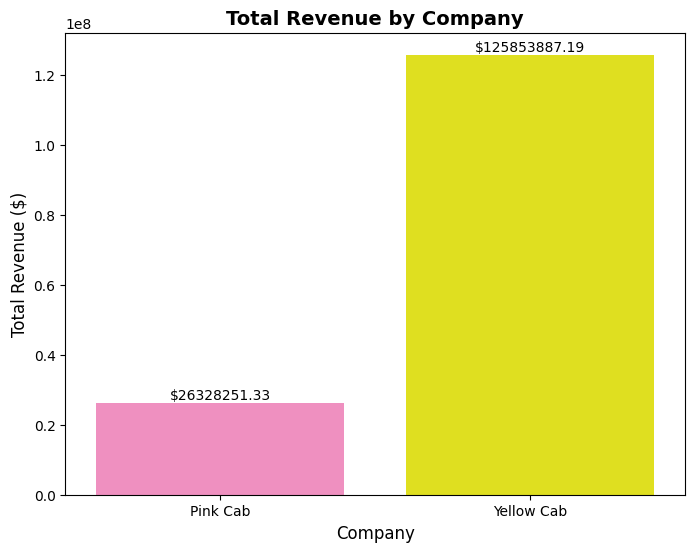

In [16]:
revenue_by_company = df.groupby('Company')['Price Charged'].sum()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=revenue_by_company.index, y=revenue_by_company.values, palette=['#FF80C0', 'yellow'])  
plt.title('Total Revenue by Company', fontsize=14, fontweight='bold')
plt.ylabel('Total Revenue ($)', fontsize=12) 
plt.xlabel('Company', fontsize=12)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.show()

#### The bar plot clearly shows that Yellow Cab’s revenue is approximately five times greater than Pink Cab’s. 

### <font color="blue"> Compare Average Trip Distance by Company </font>

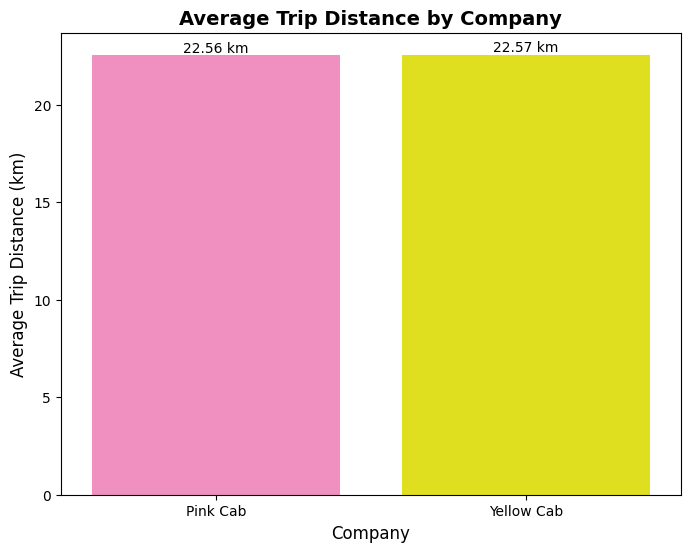

In [17]:
avg_trip_by_company = df.groupby('Company')['KM Travelled'].mean()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=avg_trip_by_company.index, y=avg_trip_by_company.values,palette=['#FF80C0', 'yellow']) 
plt.title('Average Trip Distance by Company', fontsize=14, fontweight='bold')
plt.ylabel('Average Trip Distance (km)', fontsize=12)
plt.xlabel('Company', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f} km', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.show()

#### As it can be clearly seen from the graph, the average trip distance for both companies is nearly identical.

### <font color="blue"> Relationship between Fare and Distance </font>

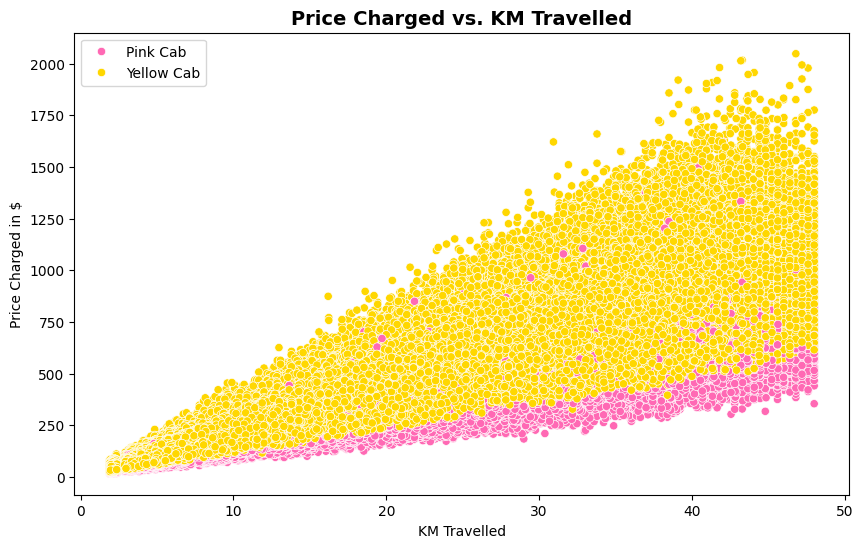

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='KM Travelled', y='Price Charged', hue='Company', data=df, palette=['#FF69B4', '#FFD700'])
plt.title('Price Charged vs. KM Travelled', fontsize=14, fontweight='bold')
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged in $')
plt.legend()
plt.show()

#### This graph shows a positive correlation between kilometers traveled and price charged for both pink and yellow cabs. While there’s some overlap, pink cabs generally appear to charge slightly more than yellow cabs for the same distance traveled. There are also some outliers, particularly for pink cabs, suggesting potential instances of surge pricing or longer routes taken.

### <font color="blue"> Analysis of Customer Demographics & Payment and Income Metrics</font>

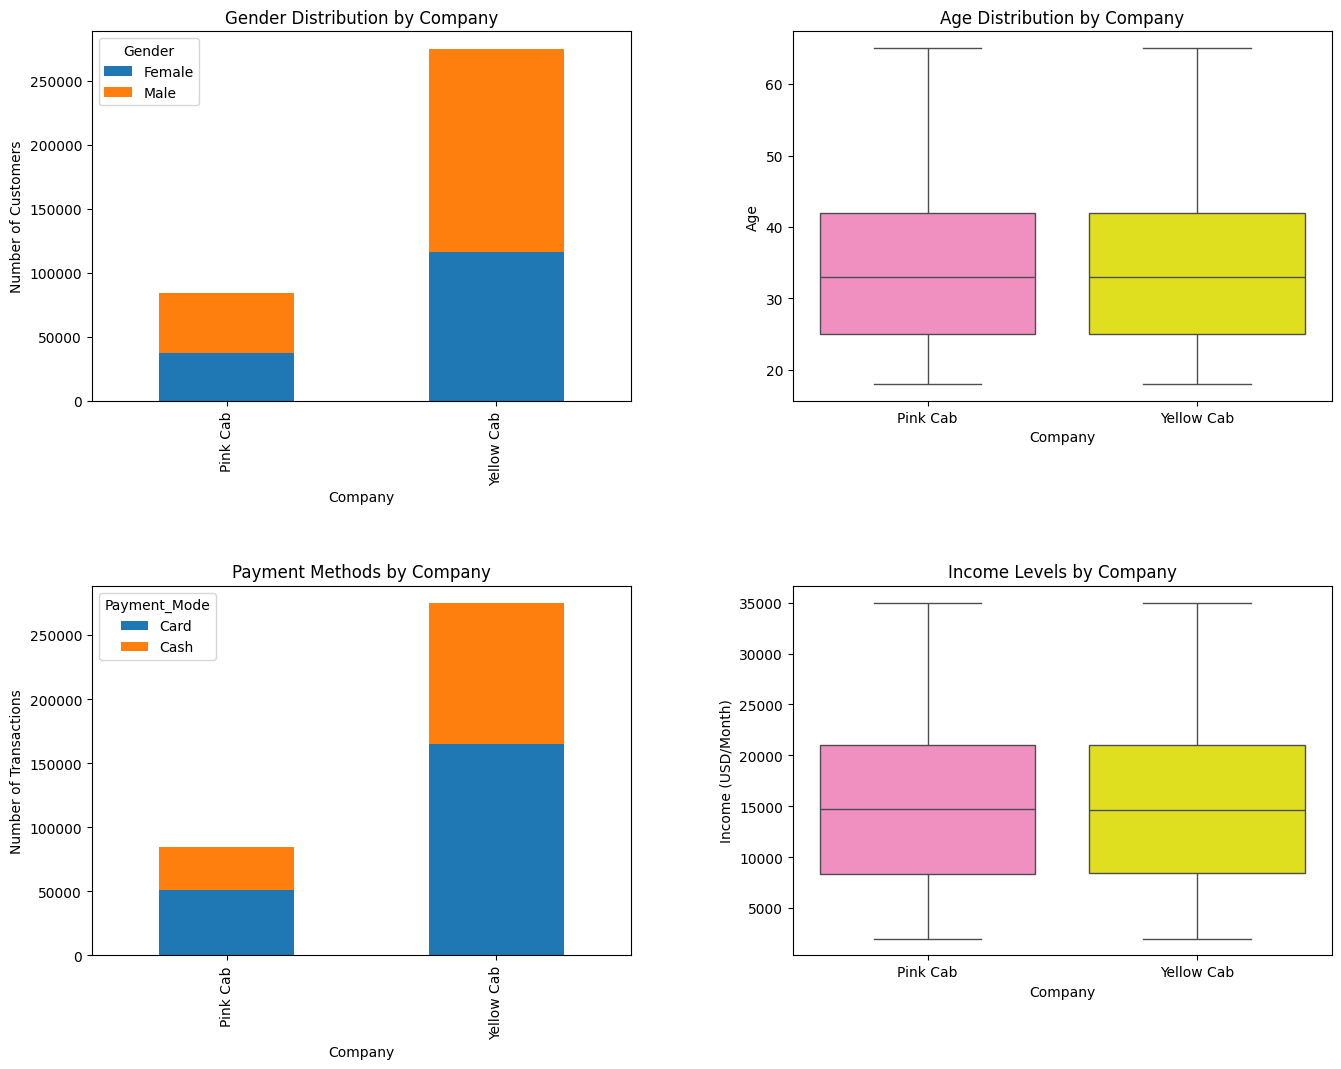

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# 1. Gender Distribution by Company
gender_distribution = df.groupby(['Company', 'Gender']).size().unstack()
gender_distribution.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution by Company')
axes[0, 0].set_xlabel('Company')
axes[0, 0].set_ylabel('Number of Customers')

# 2. Age Distribution by Company
sns.boxplot(x='Company', y='Age', data=df, palette=['#FF80C0', 'yellow'], ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Company')
axes[0, 1].set_xlabel('Company')
axes[0, 1].set_ylabel('Age')

# 3. Payment Methods by Company
payment_methods = df.groupby(['Company', 'Payment_Mode']).size().unstack()
payment_methods.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Payment Methods by Company')
axes[1, 0].set_xlabel('Company')
axes[1, 0].set_ylabel('Number of Transactions')

# 4. Income Levels by Company
sns.boxplot(x='Company', y='Income (USD/Month)', data=df, palette=['#FF80C0', 'yellow'], ax=axes[1, 1])
axes[1, 1].set_title('Income Levels by Company')
axes[1, 1].set_xlabel('Company')
axes[1, 1].set_ylabel('Income (USD/Month)')

plt.show()

In [20]:
by_gender_payment = pd.concat([gender_distribution, payment_methods], axis=1)
by_gender_payment

,Female,Male,Card,Cash
Company,,,,
Pink Cab,37480,47231,50719,33992
Yellow Cab,116000,158681,164785,109896


#### The customer gender distribution is similar for both companies, with a majority of male customers.
#### The customer age distribution is also similar for both companies.

#### Both companies have similar payment method distributions, with card payments being used 1.5 times more frequently than cash.
#### Both companies have customers with similar income levels and comparable income distributions.

### <font color="blue"> Compare Profit Margins </font>

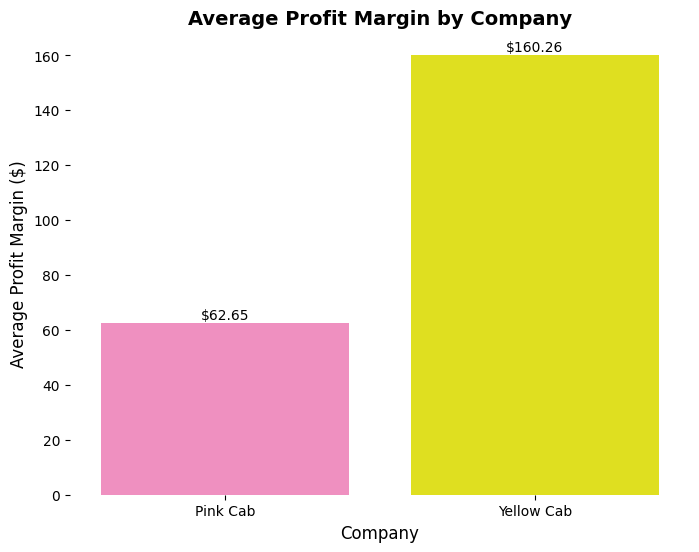

In [21]:
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

# Calculate average profit margin by company
avg_profit_by_company = df.groupby('Company')['Profit'].mean()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=avg_profit_by_company.index, y=avg_profit_by_company.values,palette=['#FF80C0', 'yellow'])

plt.title('Average Profit Margin by Company', fontsize=14, fontweight='bold')
plt.ylabel('Average Profit Margin ($)', fontsize=12)  # Add units
plt.xlabel('Company', fontsize=12) # Add x-axis label
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

sns.despine(left=True, bottom=True) # Remove spines for cleaner look
plt.show()

#### Yellow Cab's average profit margins are 2.5 times higher than those of its competitor.

## <font color="blue"> Seasonal Analysis </font>

###  Monthly Profit by Company 

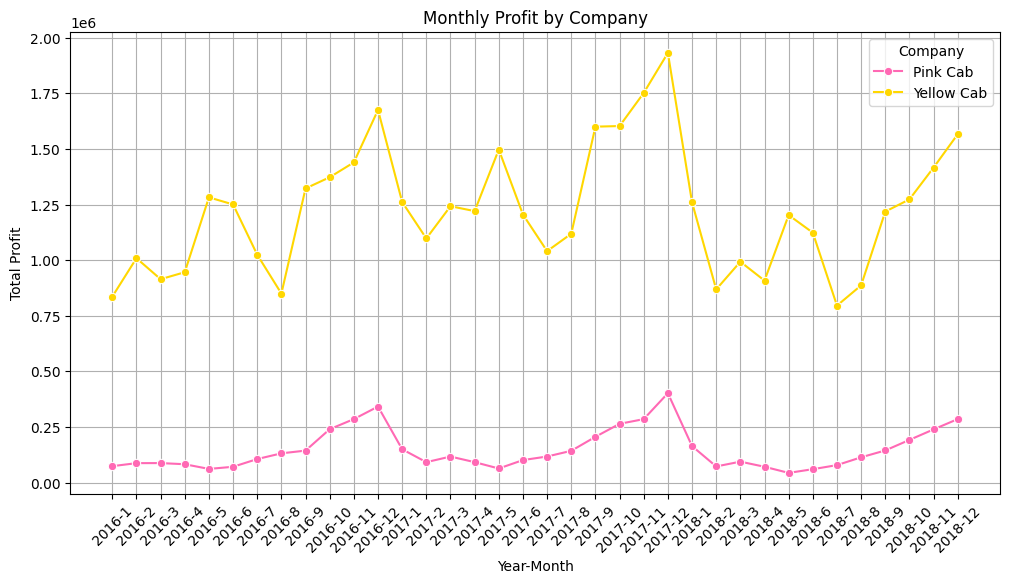

In [22]:
#let's add year, month columns
df['Month'] = df['Date of Travel'].dt.month
df['Year'] = df['Date of Travel'].dt.year

# Group by Company, Year, and Month to calculate monthly profit
monthly_profit = df.groupby(['Company', 'Year', 'Month'])['Profit'].sum().reset_index()

# Combine Year and Month into a single column for plotting
monthly_profit['Year-Month'] = monthly_profit['Year'].astype(str) + '-' + monthly_profit['Month'].astype(str)

# Plot monthly profit by company
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_profit, x='Year-Month', y='Profit', hue='Company', marker='o', palette=['#FF69B4', '#FFD700'])
plt.title('Monthly Profit by Company')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

####  The line graph shows how profit fluctuates over time for both companies. As indicated by the trends, Yellow cab consistently outperforms and both companies exhibit seasonal spikes in performance during December, indicating a consistent pattern of increased activity.

## Profit Analysis by Weekday

In [23]:
df['Weekday'] = df['Date of Travel'].dt.day_name()

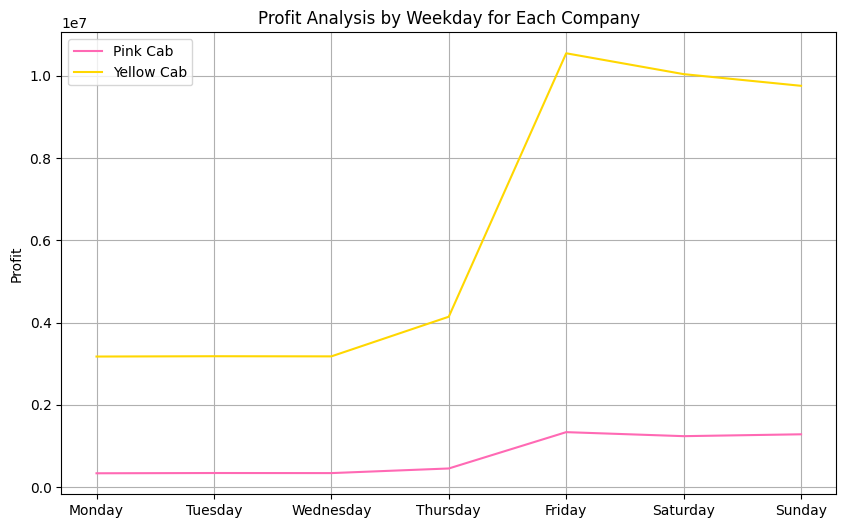

In [24]:
weekly_profit = df.groupby(['Company', 'Weekday'])['Profit'].sum().reset_index()
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_profit['Weekday'] = pd.Categorical(weekly_profit['Weekday'], categories=weekdays_order, ordered=True)
weekly_profit = weekly_profit.sort_values(by=['Company', 'Weekday'])

plt.figure(figsize=(10, 6))
for i, company in enumerate(list(weekly_profit['Company'].unique())): 
    company_data = weekly_profit[weekly_profit['Company'] == company]
    plt.plot(company_data['Weekday'], company_data['Profit'], label=company, color=['#FF69B4', '#FFD700'][i % 2])

plt.title('Profit Analysis by Weekday for Each Company')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()


#### Friday was the most profitable day for both companies, followed closely by the weekend.

## Yearly Profit Analysis 

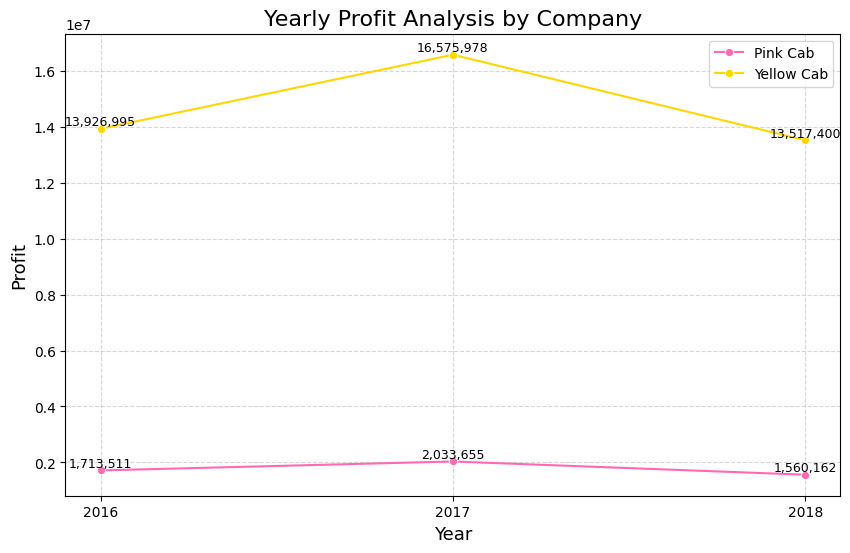

In [25]:
yearly_profit = df.groupby(['Company', 'Year'])['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Profit', hue='Company', data=yearly_profit, palette={'Pink Cab':'#FF69B4', 'Yellow Cab': '#FFD700'}, marker='o') 

plt.title('Yearly Profit Analysis by Company', fontsize=16)  
plt.xlabel('Year', fontsize=13)  
plt.ylabel('Profit', fontsize=13)  
plt.xticks(yearly_profit['Year'].unique(), fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(fontsize=10) 
plt.grid(True, linestyle='--', alpha=0.5)  

for company in yearly_profit['Company'].unique():
    company_data = yearly_profit[yearly_profit['Company'] == company]
    for x, y in zip(company_data['Year'], company_data['Profit']):
        plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=9) 

plt.show()

#### Revenue for both companies peaked in 2017 and this was followed by a decline in 2018.

### Seasonal Profit by Company

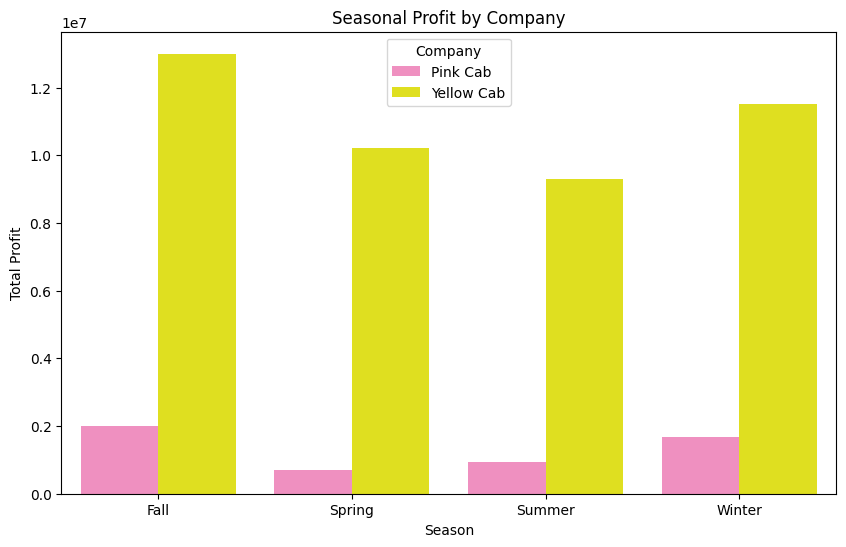

In [26]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
        
df['Season'] = df['Month'].apply(get_season)
# Group by Season and Company to calculate total profit
seasonal_profit = df.groupby(['Season', 'Company'])['Profit'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_profit, x='Season', y='Profit', hue='Company', palette=['#FF80C0', 'yellow'])
plt.title('Seasonal Profit by Company')
plt.xlabel('Season')
plt.ylabel('Total Profit')
plt.show()

#### Both companies experience higher profits during the fall and winter seasons, likely driven by increased demand due to colder weather conditions.

## <font color="blue"> City and Population Analysis </font>

### Total Profit by City 

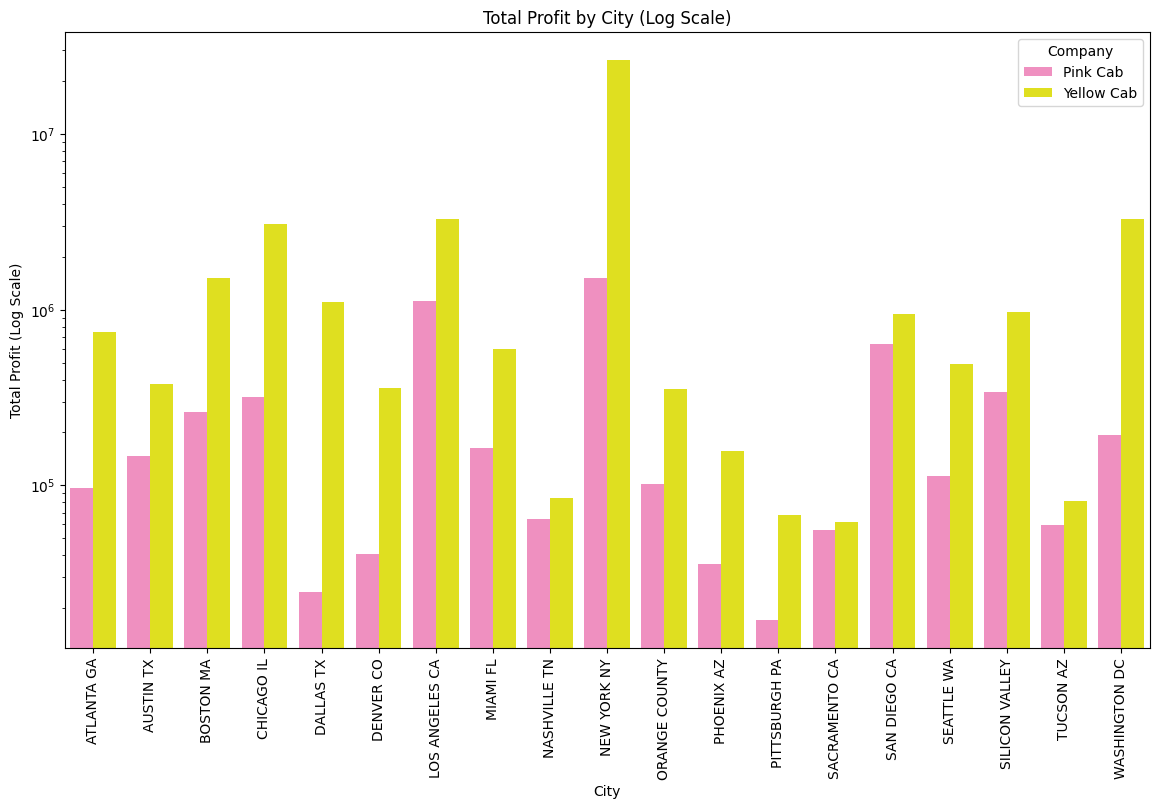

In [27]:
# Group by City and Company to calculate total profit
profit_by_city = df.groupby(['City', 'Company'])['Profit'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=profit_by_city, x='City', y='Profit', hue='Company', palette=['#FF80C0', 'yellow'])
plt.yscale('log')  # Set y-axis to log scale
plt.title('Total Profit by City (Log Scale)')
plt.xlabel('City')
plt.ylabel('Total Profit (Log Scale)')
plt.xticks(rotation=90)
plt.show()

#### New York City demonstrates significantly higher profitability for both companies compared to other locations.

In [28]:
city.head(3)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"


#### New York's population accounts for over a third of the total population across the given cities and its users account for nearly 25% of the overall user count. To better understand the population dynamics of the other cities, we'll exclude New York from our next analysis.

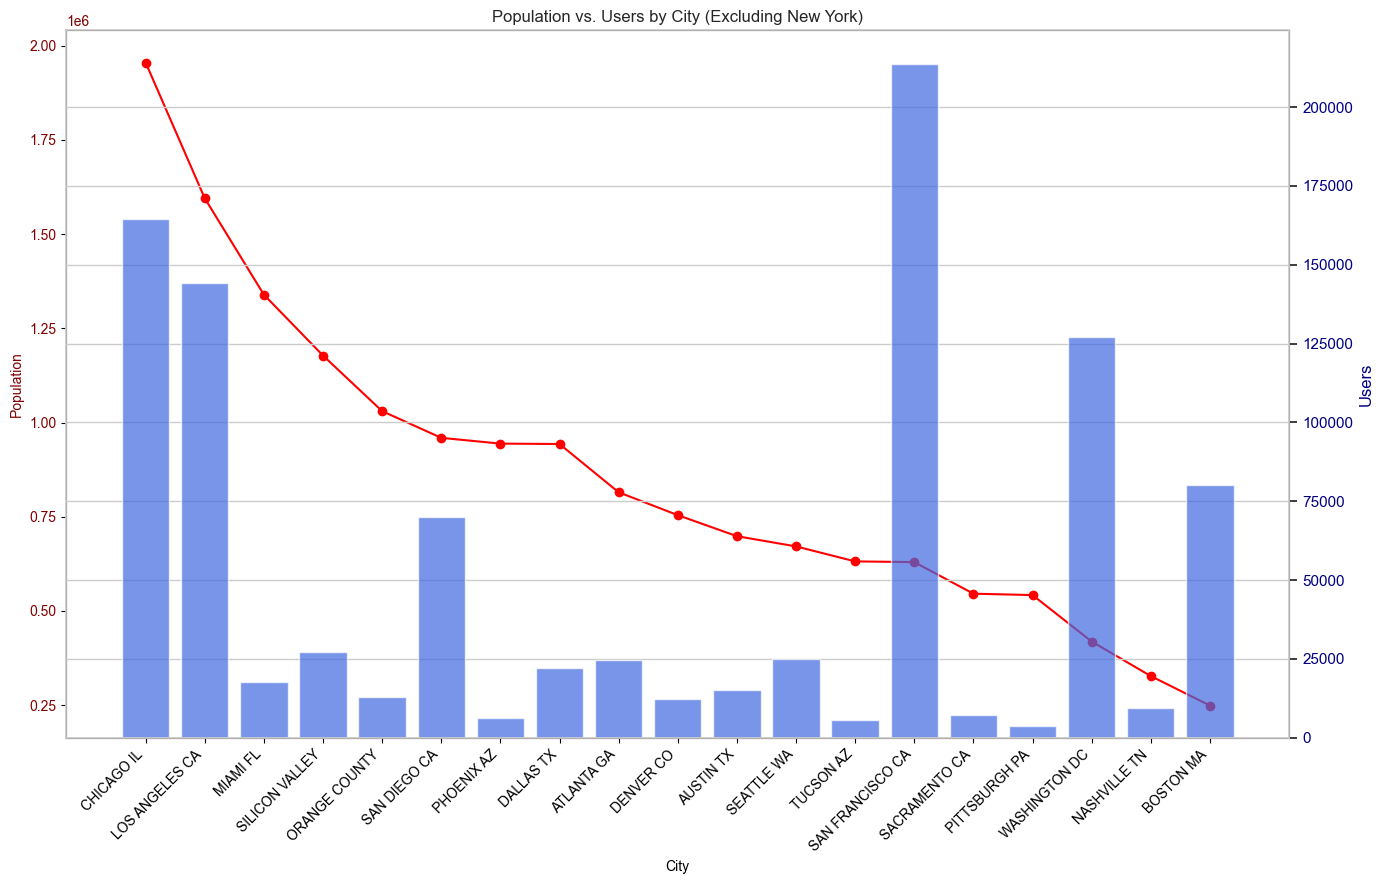

In [29]:
# Convert Population and Users columns to integers
city["Population"] = city["Population"].str.replace(",", "").astype(int)
city["Users"] = city["Users"].str.replace(",", "").astype(int)

city_filtered = city[city["City"] != "NEW YORK NY"].sort_values(by="Population", ascending=False)
fig, ax1 = plt.subplots(figsize=(14, 9))
sns.set_theme(style="whitegrid")

# Plot Population on the primary y-axis using a line plot
ax1.plot(city_filtered["City"], city_filtered["Population"], color="red", marker='o', label="Population")
ax1.set_xlabel("City")
ax1.set_ylabel("Population", color="maroon")
ax1.tick_params(axis="y", labelcolor="maroon")
ax1.set_xticklabels(city_filtered["City"], rotation=45, ha="right")

# Create the secondary y-axis for Users
ax2 = ax1.twinx()
ax2.bar(city_filtered["City"], city_filtered["Users"], color="RoyalBlue", alpha=0.7, label="Users")
ax2.set_ylabel("Users", color="navy")
ax2.tick_params(axis="y", labelcolor="navy")

plt.title("Population vs. Users by City (Excluding New York)")
fig.tight_layout()
plt.show()

### Market Growth Potential

#### If a city has a low penetration rate, there’s an opportunity for growth (e.g., more users can still be acquired).

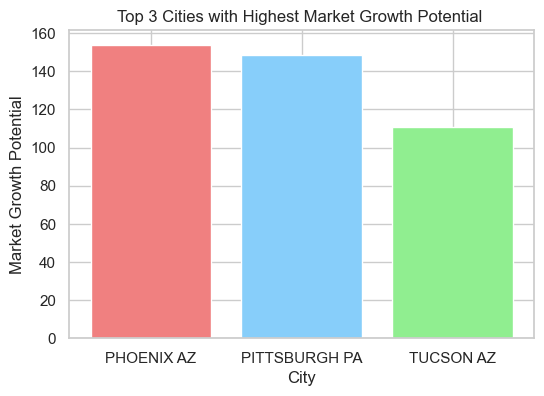

In [30]:
city_filtered["User Penetration Rate"] = (city_filtered["Users"] / city_filtered["Population"])
top_cities = city_filtered.sort_values(by="User Penetration Rate").head(3)
top_cities["Market Growth Potential"] = 1 / top_cities["User Penetration Rate"]
colors = ['lightcoral', 'lightskyblue', 'lightgreen']
plt.figure(figsize=(6, 4))
plt.bar(top_cities["City"], top_cities["Market Growth Potential"], color=colors)
plt.title("Top 3 Cities with Highest Market Growth Potential ")
plt.xlabel("City")
plt.ylabel("Market Growth Potential")
plt.show()

#### PHOENIX AZ, PITTSBURGH PA and TUCSON AZ have large populations but a low number of users, indicating significant potential for market expansion and user acquisition. 

## <font color="blue"> Future Forecasting for 2019 Profit </font>

In [31]:
yearly_profit_pink = yearly_profit[yearly_profit['Company'] == 'Pink Cab']
yearly_profit_yellow = yearly_profit[yearly_profit['Company'] == 'Yellow Cab']

# Function to forecast future profit
def forecast_profit(yearly_profit, company_name):
    X = np.array(yearly_profit['Year']).reshape(-1, 1)
    y = yearly_profit['Profit']
    
    model = LinearRegression()
    model.fit(X, y)
    
    future_year = np.array([[2019]])
    predicted_profit = model.predict(future_year)
    
    print(f'Predicted Profit for {company_name} in 2019: ${predicted_profit[0]:.2f}')

# Forecast for Pink Cab
forecast_profit(yearly_profit_pink, 'Pink Cab')

# Forecast for Yellow Cab
forecast_profit(yearly_profit_yellow, 'Yellow Cab')

Predicted Profit for Pink Cab in 2019: $1615760.41
Predicted Profit for Yellow Cab in 2019: $14263862.06


## <font color="blue"> Summary </font>

<h4> The exploratory data analysis reveals several important insights about the performance and customer behavior of Yellow Cab and Pink Cab.

1. Revenue Comparison: Yellow Cab consistently outperforms Pink Cab, with its revenue being approximately five times greater. This suggests that Yellow Cab may have a more loyal customer base, leading to higher earnings.

2. Trip Distance: The average trip distance is nearly identical for both companies, indicating that the nature of the trips (in terms of distance) is similar, and external factors like the service area may not significantly differentiate the companies in this regard. Distance and price are positively correlated for both cab companies.

3. Customer Demographics:

  * Gender Distribution: Both companies have a similar gender distribution, with a larger proportion of male customers. This suggests that both services attract a comparable demographic in terms of gender.
  
  * Age Distribution: The customer age distribution is also similar for both companies, indicating that their services appeal to a comparable range of age groups.

4. Payment Methods: Both companies show a preference for card payments, which are used 1.5 times more frequently than cash. This is a common trend in modern services, indicating customer preference for digital transactions over cash payments.

5. Income Distribution: Customers of both companies share similar income levels and distributions, suggesting that both services cater to a comparable economic demographic.

6. Profit Margins: Yellow Cab enjoys significantly higher profit margins (2.5 times greater) than Pink Cab. This could imply better operational efficiency or other factors contributing to Yellow Cab’s superior profitability.

7. Seasonality: Both companies exhibit a seasonal trend, with performance spikes during December, which suggests increased activity and demand during the holiday season. Fall and winter seasons also show higher profits, likely due to the colder weather and increased transportation needs during these months. Both companies saw peak profitability on Fridays and weekends, with highest overall revenue in 2017 followed by a decline in 2018.

8. Geographical Performance:

* New York City stands out as a key location for both companies, demonstrating much higher profitability. Its large population and nearly 25% share of the overall user count make it a critical market for both companies.

* Other Cities: Cities like Phoenix, Pittsburgh, and Tucson have large populations but fewer users, highlighting potential for market expansion and user acquisition in these regions. These cities may present untapped markets that could be capitalized on with targeted marketing and service offerings.

9. Future Forecasting: Profit projections for 2019 indicate a significant difference in performance between the two companies. While Pink Cab is predicted to generate  1,615,760 in profit, Yellow Cab is expected to achieve substantially higher profitability at 14,263,862. Considering the historical data showing declining profits for both companies from 2017 to 2018, Yellow Cab’s forecast, though lower than its 2017 peak, indicates a possible stabilization or even slight recovery. Pink Cab’s 2019 performance requires further analysis to understand its underperformance relative to Yellow Cab and identify opportunities for growth.

*Key Takeaways:*

*  Yellow Cab leads in revenue and profit margins, while both companies operate in similar market demographics.
  
*  There's a significant market potential in cities with large populations but low user numbers, suggesting opportunities for expansion.
  
*  Seasonal trends show higher profits during colder months, with New York City being the most profitable location for both companies.

*  Yellow Cab is projected to be significantly more profitable than Pink Cab in 2019, suggesting potential stabilization, while Pink Cab's underperformance warrants further analysis. 

This analysis provides a clear picture of the competitive landscape between the two companies and offers insights into potential growth areas. </h4>

## <font color="blue"> Recommendations </font>

 <h4>

*  Invest in Yellow Cab – Strong market position with 5x higher revenue & 2.5x greater profits.

*  Optimize Pink Cab – Needs cost efficiency & market expansion before consideration.

*  Expand to High-Potential Cities – Target Phoenix, Pittsburgh, Tucson for growth.

*  Leverage Seasonal Demand – Maximize fall, winter, and December peak profits.

*  Enhance Digital Payments & Loyalty – Boost retention with seamless payments & rewards.

*  Monitor Financial Trends – Address declining profits with data-driven strategies.



<font color="red"> *Final Verdict:* </font> Yellow Cab is the best investment choice; Pink Cab needs improvement.

</h4>